Cardiovascular Disease dataset
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import keras
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from sklearn.metrics import f1_score

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout

In [3]:
df= pd.read_csv('cardio_train.csv',sep=";", index_col = 'id')
df['age']= (df['age']/365).astype(int)
df['BMI'] = df['weight']/(np.power(df['height']/100, 2))
#df['BMI'] = df['BMI'].astype(int)
df['Cardio_disease'] = df['cardio']
df = df.drop(columns = ['height','cardio','weight'])
df.head(3)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,Cardio_disease
id,,,,,,,,,,,
0,50,2,110,80,1,1,0,0,1,21.967120,0
1,55,1,140,90,3,1,0,0,1,34.927679,1
2,51,1,130,70,3,1,0,0,0,23.507805,1


In [4]:
std_list = ["age" ,"BMI","ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in std_list:
        x_std[column] = (x_std[column] - x_std[column].mean()) / x_std[column].std()
    return x_std
df= standartization(df)
df.head(2)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,Cardio_disease
id,,,,,,,,,,,
0,-0.419797,2,-0.122181,-0.088238,1,1,0,0,1,-0.917571,0
1,0.319108,1,0.072610,-0.035180,3,1,0,0,1,1.210072,1


In [15]:
X = df.iloc[:,:-1]
y = df.iloc[: ,-1]
X_train,X_test ,y_train, y_test = train_test_split(X,y,
                                                   test_size=0.05,
                                                   random_state=0,
                                                   shuffle = True,
                                                   stratify = y)

In [16]:
model = Sequential()
model.add(Dense(10,
                activation='tanh' ,input_dim = 10))
model.add(Dense(64,
                activation='tanh'))
model.add(Dropout(0.15))

model.add(Dense(128,
                activation='sigmoid'))
model.add(Dropout(0.15))

model.add(Dense(64,
                activation='sigmoid'))
model.add(Dense(1,
                activation = 'sigmoid'))
######
model.compile(optimizer = 'adam' ,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])



 TRAINING

In [17]:
num_epochs = 10
history = model.fit(X_train ,
                    y_train ,
                    epochs= num_epochs ,
                    batch_size = 20,
                    validation_data=(X_train ,y_train))



Epoch 1/10
3325/3325 [==============================] - 11s 3ms/step - loss: 0.5733 - accuracy: 0.7106 - val_loss: 0.5531 - val_accuracy: 0.7270
Epoch 2/10
3325/3325 [==============================] - 9s 3ms/step - loss: 0.5528 - accuracy: 0.7271 - val_loss: 0.5482 - val_accuracy: 0.7305
Epoch 3/10
3325/3325 [==============================] - 10s 3ms/step - loss: 0.5503 - accuracy: 0.7287 - val_loss: 0.5469 - val_accuracy: 0.7309
Epoch 4/10
3325/3325 [==============================] - 9s 3ms/step - loss: 0.5486 - accuracy: 0.7291 - val_loss: 0.5472 - val_accuracy: 0.7306
Epoch 5/10
3325/3325 [==============================] - 8s 2ms/step - loss: 0.5479 - accuracy: 0.7307 - val_loss: 0.5455 - val_accuracy: 0.7320
Epoch 6/10
3325/3325 [==============================] - 7s 2ms/step - loss: 0.5474 - accuracy: 0.7320 - val_loss: 0.5458 - val_accuracy: 0.7315
Epoch 7/10
3325/3325 [==============================] - 12s 4ms/step - loss: 0.5468 - accuracy: 0.7319 - val_loss: 0.5464 - val_accura

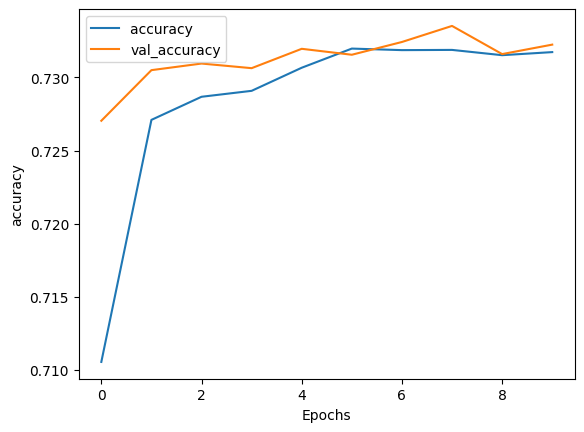

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy ', 'val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

# MODEL EVALUATION

In [43]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:3.3f} and loss {:3.3f}'.format(acc ,loss))

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) *1

print(f'f1 score : {f1_score(y_test, y_pred, average=None)} ')


Test Accuracy: 0.757 and loss 0.527
110/110 [==============================] - 0s 802us/step
f1 score : [0.75726496 0.75587393] 


In [47]:
tf.keras.models.save_model(model,'model.hdf5')

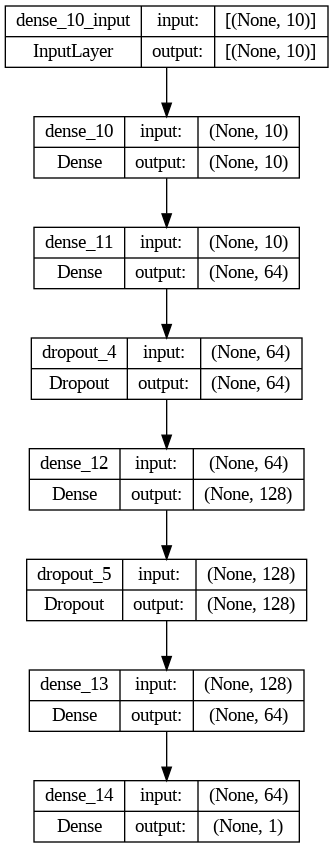

In [45]:
from keras.utils.vis_utils import plot_model
plot_model (model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)